# Proyecto 1: Estadística descriptiva 
Carolina Taborda Vargas y Luisa María Hernández Quintero 


In [83]:
#INTEGRANTES: LUISA MARÍA HERNÁNDEZ QUINTERO, CAROLINA TABORDA VARGAS
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter

## Inspeccion del archivo y carga en python 

#### Punto 2:Carga de archivo para construir el DataFrame

In [99]:
#Análisis exploratorio de datos
#Promedio de la variable Max1R13_
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2) #Leer el excel 
print(tabulate(df, headers='keys', tablefmt='github', showindex=True))

|      | SubjectID   |   Unnamed: 1 |   T_offset1 |   Max1R13_1 |   Max1L13_1 |   aveAllR13_1 |   aveAllL13_1 |   T_RC1 |   T_RC_Dry1 |   T_RC_Wet1 |   T_RC_Max1 |   T_LC1 |   T_LC_Dry1 |   T_LC_Wet1 |   T_LC_Max1 |   RCC1 |   LCC1 |   canthiMax1 |   canthi4Max1 |   T_FHCC1 |   T_FHRC1 |   T_FHLC1 |   T_FHBC1 |   T_FHTC1 |   T_FH_Max1 |   T_FHC_Max1 |   T_Max1 |   T_OR1 |   T_OR_Max1 |   Unnamed: 29 |   T_offset2 |   Max1R13_2 |   Max1L13_2 |   aveAllR13_2 |   aveAllL13_2 |   T_RC2 |   T_RC_Dry2 |   T_RC_Wet2 |   T_RC_Max2 |   T_LC2 |   T_LC_Dry2 |   T_LC_Wet2 |   T_LC_Max2 |   RCC2 |   LCC2 |   canthiMax2 |   canthi4Max2 |   T_FHCC2 |   T_FHRC2 |   T_FHLC2 |   T_FHBC2 |   T_FHTC2 |   T_FH_Max2 |   T_FHC_Max2 |   T_Max2 |   T_OR2 |   T_OR_Max2 |   Unnamed: 57 |   T_offset3 |   Max1R13_3 |   Max1L13_3 |   aveAllR13_3 |   aveAllL13_3 |   T_RC3 |   T_RC_Dry3 |   T_RC_Wet3 |   T_RC_Max3 |   T_LC3 |   T_LC_Dry3 |   T_LC_Wet3 |   T_LC_Max3 |   RCC3 |   LCC3 |   canthiMax3 |   canthi4Max3 |  

In [100]:
#Codigo para calcular el promedio de Max1R13
columna=df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1) #Llamar todas la columnas de Max1R13 y sacar el promedio 
df_promedio = pd.DataFrame(columna, columns=['promedio_max']) #Hacer un data frame con los valores asociados al promedio 
print(f"El promedio de Max1R13_ es: \n ")
print(tabulate(df_promedio, headers='keys', tablefmt='github', showindex=True))


El promedio de Max1R13_ es: 
 
|      |   promedio_max |
|------|----------------|
|    0 |        35.03   |
|    1 |        34.55   |
|    2 |        35.6525 |
|    3 |        35.2225 |
|    4 |        35.545  |
|    5 |        35.1325 |
|    6 |        35.2825 |
|    7 |        35.105  |
|    8 |        35.3075 |
|    9 |        35.89   |
|   10 |        35.275  |
|   11 |        35.385  |
|   12 |        35.5725 |
|   13 |        35.3775 |
|   14 |        36.2175 |
|   15 |        35.5825 |
|   16 |        35.385  |
|   17 |        35.44   |
|   18 |        34.7175 |
|   19 |        35.4925 |
|   20 |        35.0067 |
|   21 |        35.7    |
|   22 |        34.535  |
|   23 |        34.9775 |
|   24 |        35.99   |
|   25 |        34.87   |
|   26 |        35.63   |
|   27 |        35.0925 |
|   28 |        36.185  |
|   29 |        35.055  |
|   30 |        35.9075 |
|   31 |        35.05   |
|   32 |        35.9775 |
|   33 |        34.8875 |
|   34 |        34.8925 |
|   35 

## Análisis exploratorio de datos 

In [101]:
#Data frame con variables solicitadas  
#Sección para datos de las columasn de variables a analizar como listas 
list_1=df['aveOralM'].tolist()
list_2=df['Gender'].tolist()
list_3=df['Age'].tolist()
list_4=df['Ethnicity'].tolist()
list_5=df['T_atm'].tolist()
list_6=df['Humidity'].tolist()
list_7 = df['Cosmetics'].map({1: "Cosmético aplicado", 0: "No aplicado"}).tolist()
list_8=df_promedio['promedio_max'].tolist()

variables = {   #Hacer un diccionario con que tenga como llaves los nombres de las variables y se le asigne las listas creadas en el anterior paso 
    'aveOralM': list_1,
    'Gender': list_2,
    'Age': list_3,
    'Ethnicity': list_4,
    'T_atm': list_5,
    'Humidity': list_6,
    'Cosmetics': list_7,
    'promedio_Max1R13_': list_8,
}

# Esta parte del codigo solo es para mostrar el data frame con las variables a analizar, no se usa para el codigo 
t=pd.DataFrame(variables)
print(tabulate(t, headers='keys', tablefmt='github', showindex=True))


|      |   aveOralM | Gender   | Age   | Ethnicity                         |   T_atm |   Humidity | Cosmetics          |   promedio_Max1R13_ |
|------|------------|----------|-------|-----------------------------------|---------|------------|--------------------|---------------------|
|    0 |      36.59 | Male     | 41-50 | White                             |    24   |       28   | nan                |             35.03   |
|    1 |      37.19 | Female   | 31-40 | Black or African-American         |    24   |       26   | nan                |             34.55   |
|    2 |      37.34 | Female   | 21-30 | White                             |    24   |       26   | nan                |             35.6525 |
|    3 |      37.09 | Female   | 21-30 | Black or African-American         |    24   |       27   | nan                |             35.2225 |
|    4 |      37.04 | Male     | 18-20 | White                             |    24   |       27   | nan                |             35.545  |

#### Punto 1 Análisis exploratorio de datos: DataFrame de las variables para las metricas estadisticas 

In [102]:
#Construcción de un DataFrame de los estadisticos de las varibles 

#Tipos de datos: Variables numéricas y Variables categóricas

def valores_estadisticos(valores):  #Funcion para calculo de metricas estadisticas

    """
    Función: Calcula varias medidas estadísticas descriptivas a partir de una lista o array de valores.
    Parámetros:
    valores (list): Conjunto de datos numéricos o categóricos.

    Retorna:
    list: Una lista con las medidas estadísticas solicitadas en orden:
     
    Notas:
    - Si los datos no son numéricos, se intentará obtener únicamente la moda.
    - En caso de que no exista una moda única, se devuelve el string 'No única'.
    """
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in variables.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(tabulate(estadisticas_df, headers='keys', tablefmt='github', showindex=True))


|          |    aveOralM | Gender   | Age   | Ethnicity   |      T_atm |   Humidity | Cosmetics   |   promedio_Max1R13_ |
|----------|-------------|----------|-------|-------------|------------|------------|-------------|---------------------|
| Media    | 37.0284     | nan      | nan   | nan         | 24.1154    |  28.723    | nan         |          35.5965    |
| Mediana  | 36.94       | nan      | nan   | nan         | 24         |  26.3      | nan         |          35.5487    |
| Moda     | 36.89       | Female   | 18-20 | White       | 24         |  30        | No aplicado |          35.6775    |
| SD       |  0.509502   | nan      | nan   | nan         |  1.33634   |  13.0716   | nan         |           0.574888  |
| MAD      |  0.332741   | nan      | nan   | nan         |  0.956887  |  10.8443   | nan         |           0.418881  |
| Varianza |  0.259593   | nan      | nan   | nan         |  1.7858    | 170.867    | nan         |           0.330496  |
| IQR      |  0.3625    

**Análisis de las metricas caluladas:**

Analizando el comportamiento de las métricas calculadas en las variables numéricas como: aveOralM, T_atm, humidity y promedio_Max1R13_ se puede ver una variación  en los datos de la SD y la MAD de cada uno de ellos; donde el valor de SD es mayor para todos los casos en comparación con el valor de la MAD. Lo que puede expresar este resultado es que haya datos atípicos en el estudio. 

#### Punto 2: Verificación de datos atípicos 

In [103]:
#Metodo de rangos intercuartiles para detectar datos atipicos  
def detectar_outliers(lista): #Funcion para detecta outliers 
    """
    Detecta valores atípicos (outliers) en una lista de datos numéricos usando el método del rango intercuartílico (IQR).
    Parámetros:
    lista (list o array-like): Lista de valores numéricos a analizar.
    Retorna:
    tuple:
        - outliers (array): Valores que están fuera del rango definido por el IQR.
        - hay_atipicos (bool): True si hay al menos un valor atípico, False si no hay.
        - cantidad (int): Número total de valores atípicos encontrados.
    """
    # Convertir la lista a un array de NumPy para facilitar los cálculos
    datos = np.array(lista)
    
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Establecer los límites inferior y superior para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los valores que están fuera de los límites: los outliers
    outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]

    # Determinar si hay al menos un valor atípico
    hay_atipicos = len(outliers) > 0
    
    # Contar cuántos valores atípicos hay
    cantidad = len(outliers)

    # Devolver el array de outliers, un booleano y la cantidad
    return outliers, hay_atipicos, cantidad


#Salida de los datos 
outliers_1, hay_atipicos_1, cantidad_1 = detectar_outliers(list_1)
print("Outliers encontrados en aveOralM  :\n", outliers_1)
print("¿Hay datos atípicos en aveOralM ?", hay_atipicos_1)
print("Cantidad de datos atípicos en aveOralM :", cantidad_1)

outliers_5, hay_atipicos_5, cantidad_5 = detectar_outliers(list_5)
print("\nOutliers encontrados en T_atm:\n", outliers_5)
print("¿Hay datos atípicos en T_atm?", hay_atipicos_5)
print("Cantidad de datos atípicos en T_atm:", cantidad_5)

outliers_6, hay_atipicos_6, cantidad_6 = detectar_outliers(list_6)
print("\nOutliers encontrados en Humidity:\n", outliers_6)
print("¿Hay datos atípicos en Humidity?", hay_atipicos_6)
print("Cantidad de datos atípicos en Humidity:", cantidad_6)

outliers_8, hay_atipicos_8, cantidad_8 = detectar_outliers(list_8)
print("\nOutliers encontrados en Promedio de Max1R13:\n", outliers_8)
print("¿Hay datos atípicos en Promedio de Max1R13?", hay_atipicos_8)
print("Cantidad de datos atípicos en Promedio de Max1R13:", cantidad_8)



Outliers encontrados en aveOralM  :
 [37.79 36.14 35.99 37.79 37.99 38.69 38.54 38.59 36.09 37.79 38.09 37.99
 36.14 35.64 36.19 40.34 37.99 38.39 38.04 37.99 37.94 37.99 38.44 39.64
 35.94 36.19 36.19 38.84 38.49 37.89 38.29 38.44 37.74 35.99 37.94 36.19
 38.44 38.29 37.74 37.94 37.74 35.84 36.04 38.94 39.09 38.69 38.34 36.19
 37.94 36.19 36.19 36.09 39.84 39.59 38.29 37.69 35.54 38.29 38.84 38.64
 37.94 38.09 37.79 38.14 38.39 37.69 39.34 37.89 37.89 37.79 36.09 38.74
 37.74 38.14 38.49 38.69 38.54 37.79 39.14 37.99 37.74 38.24 37.94 37.74
 39.54 38.84 38.19 38.04 37.94 38.49 37.69 38.19 37.94 39.09 37.74 38.44
 39.24 38.14 38.94 37.89 37.94 37.89 37.94 38.39 37.94 37.69 38.74 37.79]
¿Hay datos atípicos en aveOralM ? True
Cantidad de datos atípicos en aveOralM : 108

Outliers encontrados en T_atm:
 [27.  26.7 26.8 26.9 27.2 27.2 26.9 21.4 21.2 21.4 21.4 20.5 21.2 21.4
 21.2 21.3 20.8 20.6 21.  21.1 20.8 20.8 20.7 21.  21.1 20.6 20.2 20.3
 20.6 21.  21.  21.  21.3 26.8 26.8 27.  27.  

#### Punto 3: Histogramas de las variables 

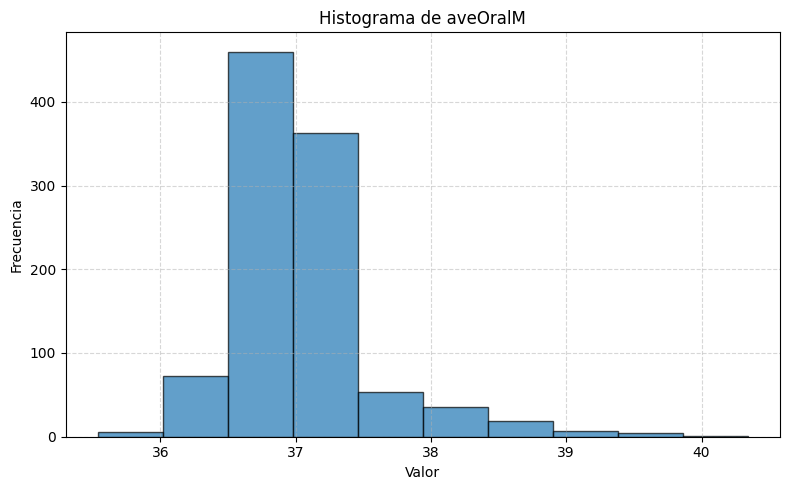

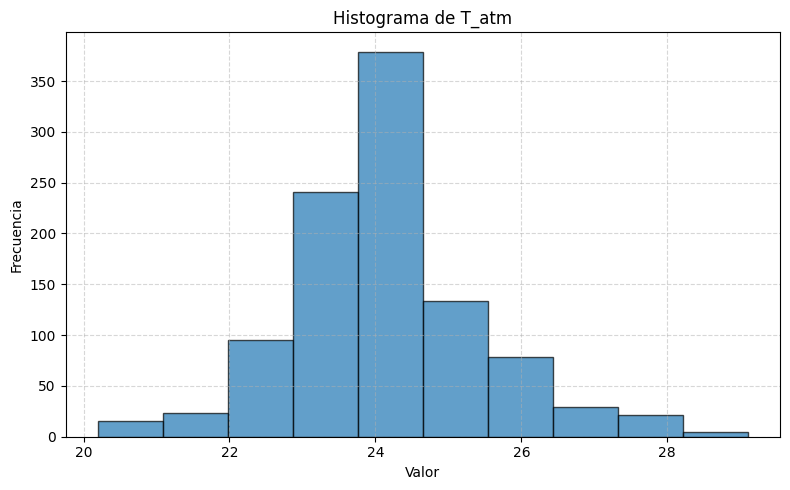

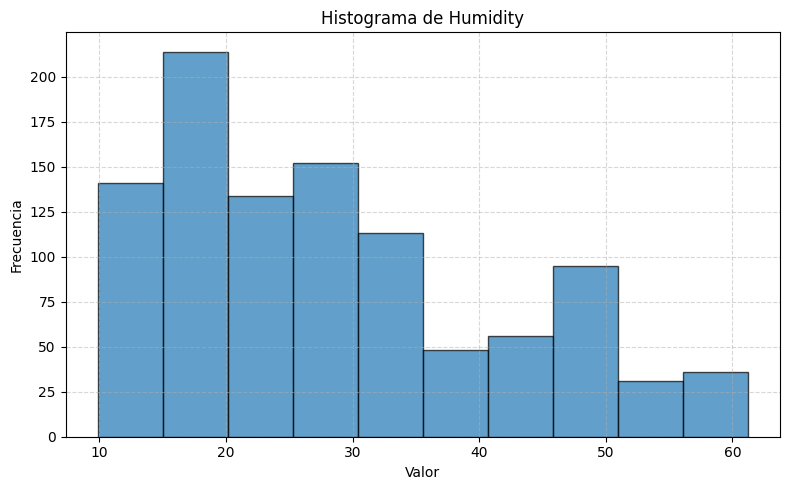

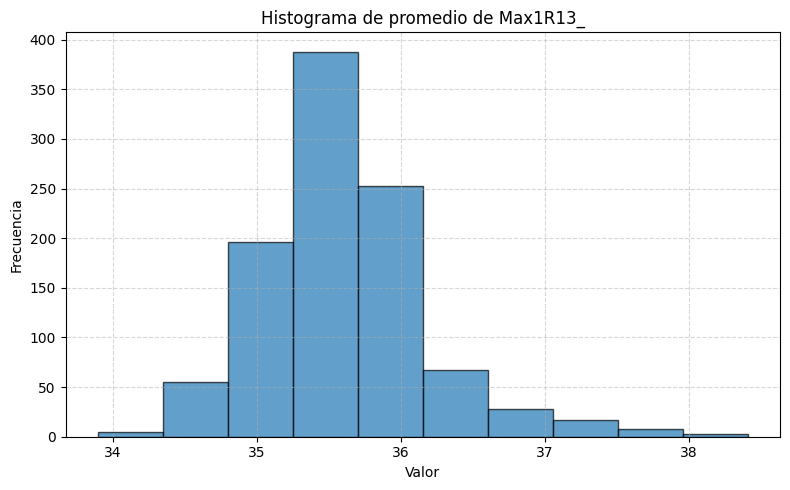

In [104]:
#Histogramas

def graficar_histograma(datos, bins=10, titulo="Histograma", xlabel="Valor", ylabel="Frecuencia"):
    """
    Grafica un histograma a partir de una lista de datos.

    Parámetros:
    - datos: lista de valores numéricos
    - bins: número de divisiones del histograma (por defecto 10)
    - titulo: título del gráfico
    - xlabel: etiqueta del eje X
    - ylabel: etiqueta del eje Y
    """
    plt.figure(figsize=(8, 5))
    plt.hist(datos, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
graficar_histograma(list_1, bins=10, titulo="Histograma de aveOralM")
graficar_histograma(list_5, bins=10, titulo="Histograma de T_atm")
graficar_histograma(list_6, bins=10, titulo="Histograma de Humidity")
graficar_histograma(list_8, bins=10, titulo="Histograma de promedio de Max1R13_")


**Análisis de histograma:**

1. **Histograma de la variable aveOralM:**
El historgrama que describe la variable numérica aveOralM, tiene una forma de campana en el centro, lo cual describe una distribución normal. Sin embargo, presenta una cola de valores  hacia la derecha, lo cual muestra un posible sesgo en los datos, por lo que no presenta un comportamiento normal.


2. **Histrograma de la variable T_atm:**
El histrograma que describe la variale T_atm muestra una distribución normal y simétrica, debido a que tiene forma de campana y la mayoria de los datos están alrededor del promedio, por lo que hay frecuencias similares y no se presentan colas marcadas hacia ningún lado.

3. **Histograma de Humidity:**
El histograma que describe la variable Humidity, no presenta una distribución normal de los datos. Allí, se evidencia que hay una cola más extendida hacia la derecha y la mayoría de datos se encuentran agrupados hacia el lado izquierdo; por lo que no es una distribución simétrica.

4. **Histograma de promedio de Max1R13_:**
El histograma que describe la variable Max1R13_, presenta cierta forma de campana en los rangos de  datos que están en el valor 35-36, sin embargo, presenta poca simetría hacia la derecha, ya que hay presencia de una cola de datos hacia ciertos valores. Se puede decir, que puede tratarse como una variable que posee datos normalmente distribuidos pero para tener precisión en el tratamiento de datos, se pueden aplicar pruebas de normalidad.

#### Punto 4: Caja de bigotes 

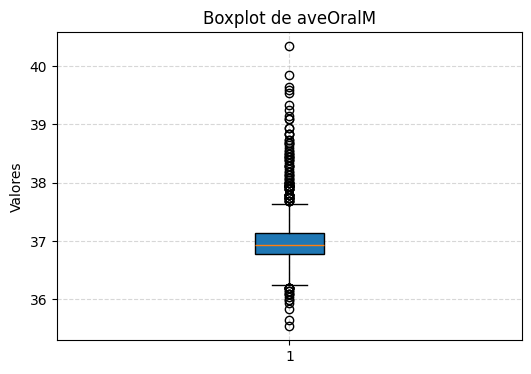

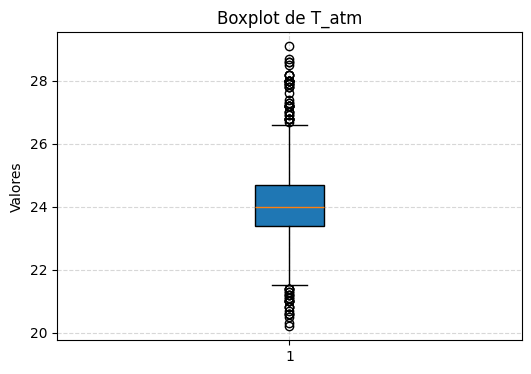

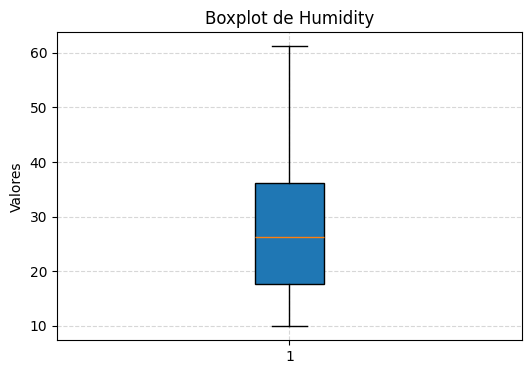

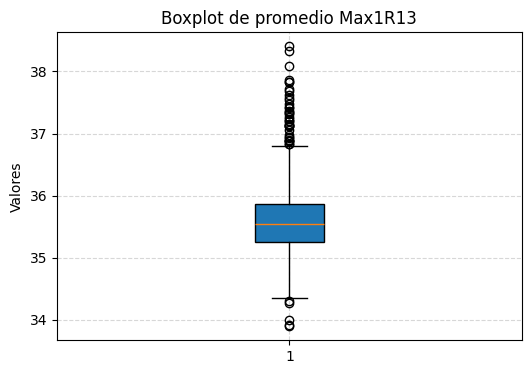

In [90]:
# Supongamos que tus listas numéricas son estas:
variables = [
    list_1,  # aveOralM
    list_5,  # T_atm
    list_6,  # Humidity
    list_8   # promedio Max1R13
]

nombres = ['aveOralM', 'T_atm', 'Humidity', 'promedio Max1R13']
# Crear un gráfico de caja por separado para cada variable
for i in range(len(variables)):
    plt.figure(figsize=(6, 4))
    plt.boxplot(variables[i], patch_artist=True)
    plt.title(f"Boxplot de {nombres[i]}")
    plt.ylabel("Valores")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


**Análisis de cajas y bigotes**

1. Variable aveOralM: Esta variable presenta una caja más pequeña representando  la distancia entre los cuartiles Q1  y Q3, lo que indica que hay una distribución bastante compacta o consistente en su parte central. Por otro lado, los puntos que están por encima y debajo de los bigotes son outliers indicando posible errores, lo que indica una distribución poco normal de todos los datos. Por último, presenta una mediana  algo centrada dentro de la caja, lo que sugiere una distribución moderadamente simétrica, pero los atípicos hacia arriba indican una posible cola derecha (asimetría positiva).

2. Variable T_atm:  La caja es moderadamente ancha, lo que indica cierta variabilidad en los valores centrales. La mediana está centrada dentro de la caja, sugiriendo simetría en la distribución. Aunque hay varios valores atípicos, no se evidencia un sesgo marcado, por lo que la distribución podría ser aproximadamente normal con algunas observaciones extremas.

3. Variable Humidity: La caja es considerablemente ancha, lo que indica una alta dispersión en los valores centrales. La mediana está desplazada hacia la parte inferior de la caja, lo que sugiere una distribución asimétrica con sesgo positivo. No se observan outliers entonces los datos no tienen valores extremos que alteren el análisis.


4. Variable promedio Max1R13_: La caja es estrecha, lo que indica una baja dispersión en los datos centrales. La mediana está bien centrada dentro de la caja, lo que sugiere una distribución aproximadamente simétrica. Aunque hay presencia de algunos valores atípicos tanto por encima como por debajo, estos no son extremos, por lo que la distribución puede considerarse estable y controlada.

### Punto 5: Gráficos de barras para variables categoricas 

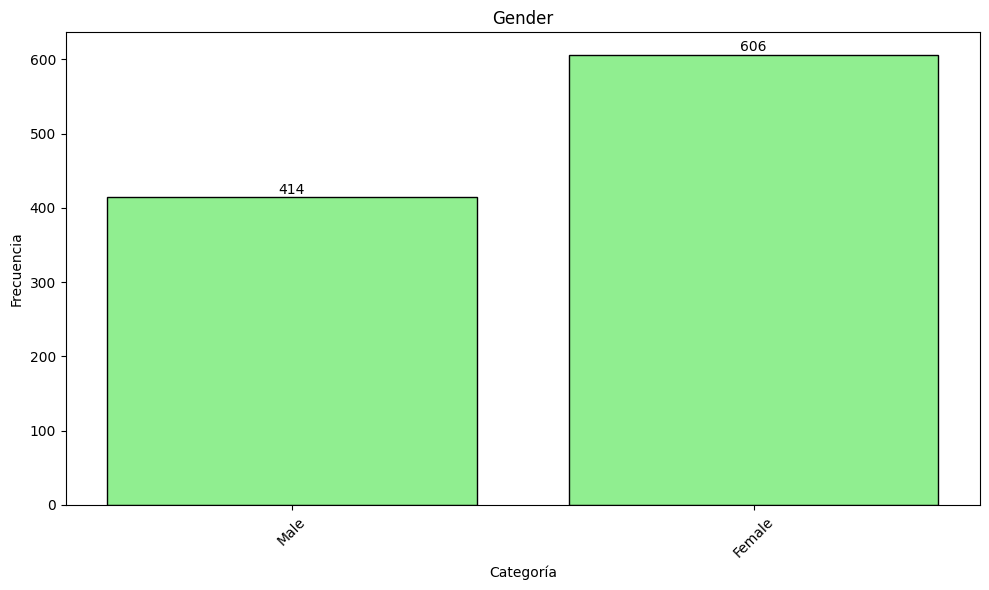

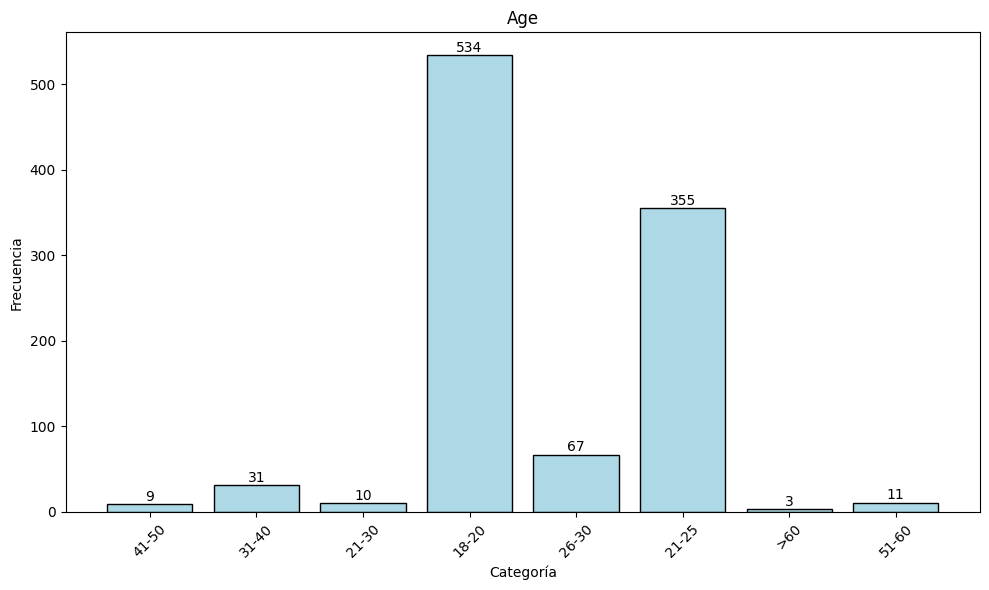

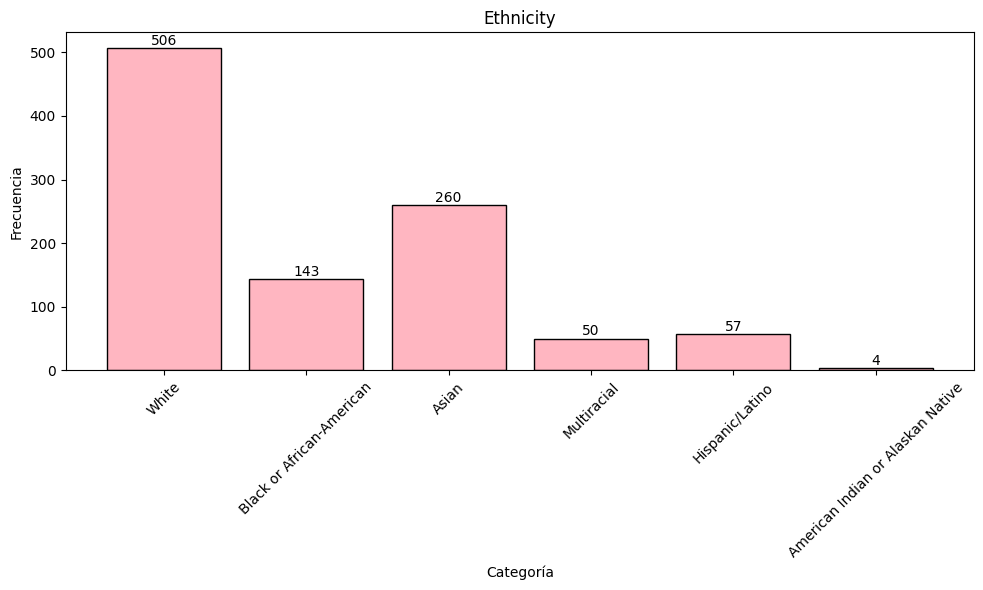

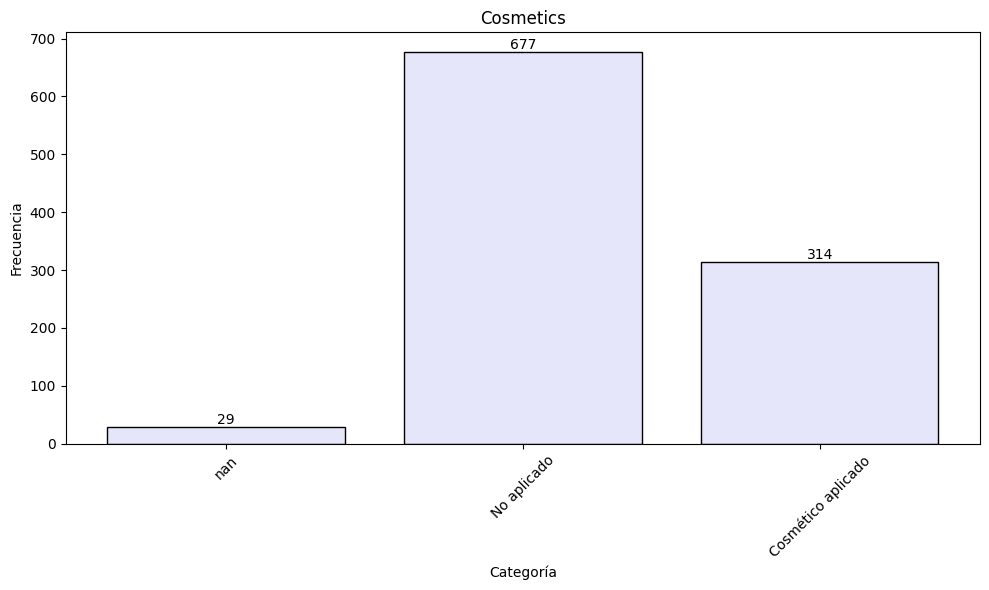

In [91]:
#Gráficos de barras

def graficar_categorias_desde_lista(lista, titulo="Frecuencia por categoría", color='lightgreen'):
    """
    Genera una gráfica de barras para una lista de datos categóricos.
    """
    conteo = Counter(lista)
    
    categorias = list(conteo.keys())
    frecuencias = list(conteo.values())

    x = list(range(len(categorias)))  # convertir las categorías a índices numéricos

    plt.figure(figsize=(10, 6))
    plt.bar(x, frecuencias, color=color, edgecolor='black')
    plt.xticks(ticks=x, labels=categorias, rotation=45)
    plt.title(titulo)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")

    for i, valor in enumerate(frecuencias):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

graficar_categorias_desde_lista(list_2, 'Gender',color='lightgreen' )
graficar_categorias_desde_lista(list_3, 'Age',color='lightblue' )
graficar_categorias_desde_lista(list_4, 'Ethnicity',color='lightpink' )
graficar_categorias_desde_lista(list_7, 'Cosmetics',color='lavender')

**Análisis de gráfico de barras**

1. **Variable de género:**
El gráfico de barras para la variable categórica 'Gender', muestra la distribución de la población entre personas del sexo masculino y del sexo femenino; en donde hay una mayor proporción de participantes del género femenino comparado con los del género masculino. Asimismo, se puede decir que las mujeres representan el 59.4% de la población y los hombres, el 40.6%. 

2. **Variable de edad:**
El gráfico para la variable 'Age', categoriza a las personas de la población por rangos de edad, en los que se evidencia que hay mayor cantidad de personas con un rango de edad de 18-20 años, los cuales representan el 87% del total. Por otro lado, las demás categorías de edad tienen menor representación.

3. **Variable de etnia:**
Esta gráfica representa la variable 'Ethnicity', la cual divide a la población según la etnicidad. Allí, se puede evidenciar que la mayor cantidad de personas evaluadas en esta población son blancos, los cuales representan aproximadamente el 49.61% de las personas evaluadas. Por otro lado, las otras etnias que poseen representación en esta evaluación son las personas asiáticas, que representan el 25.49% de la población y las personas afroamericanas que son el 14% de la población. Por último, los grupos multiraciales, hispano-latinos e indio americanos presentan una frecuencia menor en la evaluación de la etnia de la población, considerandose como solamente un 5%, 5.58% y un 0.39% respectivamente.


4. **Variable cosméticos:**
El gráfico de barras que representa a la variable 'cosmetics', muestra la frecuencia de uso de cosméticos aplicados y no aplicados. En este gráfico, es importante resaltar que hay presencia de datos como 'Nan', lo que indica que pueden haber datos perdidos o que no fueron registrados en la prueba, lo que representa un 2.84% de los datos de la población. Por otro lado, se puede concluir que la mayoría de individuos no se aplicaron los cosméticos; esto representa el 66.37%, mientras que hay una proporción del 30.78% de personas que sí se aplicaron los cosméticos.


#### Punto 6 :Matriz de correlación

Matriz de correlación:
                   aveOralM     T_atm  Humidity  promedio_Max1R13_
aveOralM           1.000000  0.098663  0.063595           0.741902
T_atm              0.098663  1.000000  0.119270           0.275363
Humidity           0.063595  0.119270  1.000000           0.050884
promedio_Max1R13_  0.741902  0.275363  0.050884           1.000000


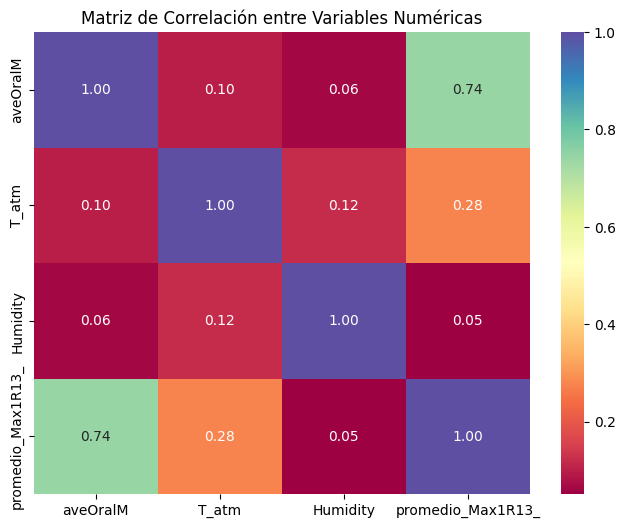

In [92]:
#Matriz de correlación
import seaborn as sns

variables = {
    'aveOralM': list_1,
    'T_atm': list_5,
    'Humidity': list_6,
    'promedio_Max1R13_': list_8,
}

# Convertir a DataFrame
df = pd.DataFrame(variables)

# Calcular matriz de correlación
matriz_corr = df.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Análisis de la matriz de correlación entre variables:**

Para estudiar qué variable puede ser descrita en términos de otra, observamos el comportamiento entre pares de variables, para ello se tiene:

1. **aveOralM y promedio_Max1R13_:** Presentan una correlación de 0.74, lo que indica una correlación positiva según el mapa de calor que se muestra. De esta manera, esta relación sugiere que cuando aumentan los valores de la variable promedio_Max1R13_ también lo hacen los datos de aveOralM, además del comportamiento estadístico, esto se puede deber a que ambas variables están relacionadas con las temperaturas corporales estudiadas en la población.

2. **T_atm y promedio_Max1R13_:** Presentan una correlación de 0.28 que representa una correlación positiva pero mucho más baja que la relación que presente entre aveOralM y promedio_Max1R13_. A pesar de ser un resultado bajo, esta relación indica que la variable de temperatura ambiente puede cambiar ligeramente si la variable de promedio Max1R13_ también cambia. Sin embargo, no es suficientemente fuerte como para asegurar la descripción de una variable en términos de otra.

3. **T_atm y aveOralM:** La correlación de estas dos variables es de 0.10, lo que representa una correlación muy baja entre estas dos variables. Esto indica que, la temperatura ambiente no presenta influencia sobre aveOralM, por lo que tampoco aplica para que una pueda ser descrita con respecto la otra.

4. Humidity con respecto a las demás variables:
-Humidity y aveOralM: correlación de 0.06
-Humidity y T_atm: correlación de 0.12
-Humidity y promedio_Max1R13_: correlación de 0.05
Todas las correlaciones de humidity con las demás variables son muy bajas, lo que indica que no habrá una influencia significativa de una variable con respecto a la otra.

**CONCLUSIÓN:** Como la correlación más alta es entre aveOralM y promedio_Max1R13_ , podemos decir que no solo hay una tendencia a que se comporten de forma similar, sino que también se puede describir una en términos de la otra.

### Muestreo de datos 

In [105]:
#Codigo para obtener data frame de la poblacion
df_1 = pd.read_excel("FLIR_groups1and2.xlsx", header=2)
def promedio_data(df,  p, q, r, s):
    columna = df[[p, q, r, s]].mean(axis=1)
    return columna.tolist()

T_CRmax=promedio_data(df_1, "Max1R13_1", "Max1R13_2", "Max1R13_3", "Max1R13_4")
T_CLmax=promedio_data(df_1, "Max1L13_1", "Max1L13_2","Max1L13_3","Max1L13_4" )
T̅_CRR=promedio_data(df_1, "aveAllR13_1", "aveAllR13_2", "aveAllR13_3","aveAllR13_4" )
T̅_CRL=promedio_data(df_1, "aveAllL13_1", "aveAllL13_2", "aveAllL13_3","aveAllL13_4" )
T_CEmax=promedio_data(df_1, "canthiMax1", "canthiMax2", "canthiMax3","canthiMax4" )
T_FEmax=promedio_data(df_1,"T_FH_Max1","T_FH_Max2","T_FH_Max3","T_FH_Max4")
T_FCmax=promedio_data(df_1,"T_FHC_Max1","T_FHC_Max2","T_FHC_Max3","T_FHC_Max4")
T_max=promedio_data(df_1, "T_Max1","T_Max2","T_Max3","T_Max4")
T_Mmax=promedio_data(df_1,"T_OR_Max1","T_OR_Max2","T_OR_Max3","T_OR_Max4")
T_FC= promedio_data(df_1, "T_FHCC1", "T_FHCC2", "T_FHCC3","T_FHCC4" ) 
T_FR=promedio_data(df_1,"T_FHRC1", "T_FHRC2","T_FHRC3","T_FHRC4" ) 
T_FL=promedio_data(df_1, "T_FHLC1","T_FHLC2","T_FHLC3","T_FHLC4"  )
T_FB=promedio_data(df_1, "T_FHBC1","T_FHBC2","T_FHBC3","T_FHBC4")
T_FT=promedio_data(df_1, "T_FHTC1","T_FHTC2","T_FHTC3","T_FHTC4")

df_resultados_dic = {  #data frame con el promedio de los valores del termografo 
    "T_CRmax": T_CRmax,
    "T_CLmax": T_CLmax,
    "T̅_CRR": T̅_CRR,
    "T̅_CRL": T̅_CRL,
    "T_CEmax": T_CEmax,
    "T_FEmax": T_FEmax,
    "T_FCmax": T_FCmax,
    "T_max": T_max,
    "T_Mmax": T_Mmax,
    "T_FC": T_FC,
    "T_FR": T_FR,
    "T_FL": T_FL,
    "T_FB": T_FB,
    "T_FT": T_FT
}
df_resultados=pd.DataFrame(df_resultados_dic)

print("Tabla de poblacion de datos pbtenidos por termografo:  \n")
print(tabulate(df_resultados, headers='keys', tablefmt='github', showindex=True))


Tabla de poblacion de datos pbtenidos por termografo:  

|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|
|    0 |   35.03   |   35.3775 | 34.4    | 34.9175 |   35.3775 |   34.53   |   34.0075 | 35.6925 |  35.6525 | 33.5775 | 33.4775 | 33.3725 | 33.4925 | 33.0025 |
|    1 |   34.55   |   34.52   | 33.93   | 34.225  |   34.74   |   34.6825 |   34.66   | 35.175  |  35.1075 | 34.0325 | 34.055  | 33.6775 | 33.97   | 34.0025 |
|    2 |   35.6525 |   35.5175 | 34.2775 | 34.8    |   35.7175 |   35.345  |   35.2225 | 35.9125 |  35.885  | 34.9    | 34.8275 | 34.6475 | 34.82   | 34.67   |
|    3 |   35.2225 |   35.6125 | 34.385  | 35.2475 |   35.6125 |   35.6025 |   35.315  | 35.72   |  34.9825 | 34.44   | 34.4225 | 34.655  | 3

In [106]:
# 
# Calcular estadísticas para cada variable
estadisticas_poblacion = {
    nombre: valores_estadisticos(lista) for nombre, lista in df_resultados_dic
    .items()
}

# Crear DataFrame con los resultados
estadisticas_poblacion_df = pd.DataFrame(
    estadisticas_poblacion,
    index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"]
)

# Imprimir resultados
print("Estadísticas descriptivas de la poblacion:\n")
print(tabulate(estadisticas_poblacion_df, headers='keys', tablefmt='github', showindex=True))

Estadísticas descriptivas de la poblacion:

|          |    T_CRmax |    T_CLmax |      T̅_CRR |      T̅_CRL |    T_CEmax |    T_FEmax |    T_FCmax |       T_max |     T_Mmax |       T_FC |       T_FR |       T_FL |       T_FB |       T_FT |
|----------|------------|------------|------------|------------|------------|------------|------------|-------------|------------|------------|------------|------------|------------|------------|
| Media    | 35.5965    | 35.6115    | 34.8885    | 35.0113    | 35.7875    | 35.4216    | 35.0941    | 36.0848     | 35.8383    | 34.5739    | 34.5678    | 34.5653    | 34.4877    | 34.5773    |
| Mediana  | 35.5487    | 35.575     | 34.915     | 34.9975    | 35.7138    | 35.3912    | 35.1       | 36.0275     | 35.825     | 34.605     | 34.5975    | 34.6025    | 34.5129    | 34.6225    |
| Moda     | 35.6775    | 35.665     | 35.175     | 34.8       | 35.82      | 35.17      | 35.1175    | 36.0325     | 35.81      | 34.4075    | 35.0025    | 34.7725    | 

#### Punto 1: Muestreo aleatorio y métricas estadísticas 

##### Muestreo aleatorio 

In [107]:
# Muestreo de datos punto 1
# 1. Realizar el muestreo aleatorio simple con n=500
muestra = df_resultados.sample(n=500) #dataframe de la muestra aleatoria (sample selecciona una muestra aleatoria), randome_state = para siempre obtener la muestra arbitraria 
print("Muestreo aleatorio simple con n=500: \n")
print(tabulate(muestra, headers='keys', tablefmt='github', showindex=True))

Muestreo aleatorio simple con n=500: 

|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|
|  113 |   35.2833 |   35.5133 | 34.4267 | 34.5667 |   35.5467 |   35.16   |   34.75   | 35.9033 |  35.8267 | 34.25   | 34.0433 | 34.26   | 33.8    | 34.3667 |
|  674 |   35.17   |   35.465  | 34.3175 | 34.775  |   35.5275 |   34.8125 |   34.7025 | 35.675  |  35.545  | 34.01   | 33.74   | 33.865  | 33.7675 | 34.11   |
|  649 |   35.3625 |   35.4    | 34.71   | 34.86   |   35.63   |   35.4875 |   35.0325 | 35.9325 |  35.79   | 34.86   | 34.6925 | 34.625  | 34.63   | 34.8425 |
|  971 |   35.295  |   34.895  | 34.815  | 34.54   |   35.3525 |   35.2475 |   34.95   | 35.7625 |  35.735  | 34.5725 | 34.235  | 34.4375 | 34.5525 | 34.8325 |

##### Métricas para muestra 

In [108]:
#Codigo para encontrar estadisticas metricas de la poblacion 
df_resultados_metricas = {
    "T_CRmax": muestra['T_CRmax'].tolist(),
    "T_CLmax": muestra['T_CLmax'].tolist(),
    "T̅_CRR": muestra['T̅_CRR'].tolist(),
    "T̅_CRL": muestra['T̅_CRL'].tolist(),
    "T_CEmax": muestra['T_CEmax'].tolist(),
    "T_FEmax": muestra['T_FEmax'].tolist(),
    "T_FCmax": muestra['T_FCmax'].tolist(),
    "T_max": muestra['T_max'].tolist(),
    "T_Mmax": muestra['T_Mmax'].tolist(),
    "T_FC": muestra['T_FC'].tolist(),
    "T_FR": muestra['T_FR'].tolist(),
    "T_FL": muestra['T_FL'].tolist(),
    "T_FB": muestra['T_FB'].tolist(),
    "T_FT": muestra['T_FT'].tolist()
}

# Calcular estadísticas para cada variable
estadisticas_muestra = {
    nombre: valores_estadisticos(lista) for nombre, lista in df_resultados_metricas.items()
}

# Crear DataFrame con los resultados
estadisticas_muestra_df = pd.DataFrame(
    estadisticas_muestra,
    index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"]
)

# Imprimir resultados
print("Estadísticas descriptivas de la muestra con n=500:\n")
print(tabulate(estadisticas_muestra_df, headers='keys', tablefmt='github', showindex=True))

Estadísticas descriptivas de la muestra con n=500:

|          |    T_CRmax |    T_CLmax |      T̅_CRR |      T̅_CRL |    T_CEmax |    T_FEmax |    T_FCmax |       T_max |     T_Mmax |       T_FC |       T_FR |       T_FL |       T_FB |       T_FT |
|----------|------------|------------|------------|------------|------------|------------|------------|-------------|------------|------------|------------|------------|------------|------------|
| Media    | 35.5964    | 35.6034    | 34.8968    | 35.011     | 35.7885    | 35.4245    | 35.0965    | 36.0774     | 35.8383    | 34.5642    | 34.5479    | 34.5525    | 34.4796    | 34.5662    |
| Mediana  | 35.5388    | 35.5537    | 34.9188    | 35.0012    | 35.6917    | 35.395     | 35.0837    | 36.025      | 35.8062    | 34.6138    | 34.5587    | 34.6013    | 34.5025    | 34.6262    |
| Moda     | 35.7875    | 35.665     | 34.5625    | 34.86      | 35.5125    | 35.1125    | 34.9675    | 36.065      | 36.0025    | 34.69      | 34.91      | 34.62

**Análisis:**
Las métricas estadísticas de la muestra aleatoria de tamaño 500 son muy similares a las de la población completa. Esto indica que la muestra es representativa, ya que no hay diferencias significativas en medidas como la media, mediana, desviación estándar y coeficientes de variación. Por tanto, se puede confiar en que los análisis realizados sobre esta muestra reflejan adecuadamente el comportamiento de toda la población.



#### Punto 2: Muestreo estratificado 

##### Estratificación
Se eligió la variable categórica 'Gender' como criterio de estratificación debido a que permite dividir la muestra en subgrupos homogéneos. Esta variable presenta una distribución balanceada entre dos grupos bien definidos, lo cual facilita una representación más precisa de las características de la población. Además, al utilizar un criterio claro como el género, se mejora la capacidad para identificar patrones específicos dentro de cada subgrupo y garantizar una mejor representatividad en el muestreo.

In [109]:
#Estartificacion de toda la poblacion  
df_copy=df_resultados.copy() #Para no dañar data frame de población
df_copy['Gender'] = df['Gender'].astype('category') #Crear una columna adicional en df_copy adicionando la columna de categoria de df original 
conteo=df_copy['Gender'].value_counts()  #Para ver cuanto sujetos hay por estrato 
n_total = 500 # Número total de muestras
proporciones = conteo / conteo.sum()# Calcular proporción por estrato
n_por_estrato = (proporciones * n_total).round().astype(int) # Calcular número de muestras por estrato

df_muestra_estr = (     #DataFrame para hacer 
    df_copy
    .groupby('Gender', group_keys=False)
    .apply(lambda x: x.sample(n=n_por_estrato[x.name]))
)
print("Muestra estratificada:\n")
print(tabulate(df_muestra_estr, headers='keys', tablefmt='github', showindex=True))



Muestra estratificada:

|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT | Gender   |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|----------|
|  638 |   35.8775 |   36.0025 | 35.235  | 35.5075 |   36.04   |   35.1675 |   35.14   | 36.04   |  35.76   | 34.845  | 34.5475 | 34.8625 | 34.8275 | 34.885  | Female   |
|  731 |   37.235  |   36.955  | 36.49   | 36.5175 |   37.2725 |   36.9375 |   36.345  | 37.46   |  36.8025 | 35.8075 | 35.805  | 35.535  | 35.835  | 35.995  | Female   |
|  596 |   35.665  |   35.5775 | 34.455  | 34.8225 |   35.83   |   35.6475 |   35.565  | 35.9575 |  35.9225 | 34.93   | 35.3675 | 34.695  | 34.56   | 35.14   | Female   |
|    5 |   35.1325 |   35.2025 | 34.5275 | 34.5825 |   35.25   |   34.86   |   34.6925 | 35.85   |  35.85   | 34.1925 |

C:\Users\yamhile\AppData\Local\Temp\ipykernel_4916\19399201.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Gender', group_keys=False)
C:\Users\yamhile\AppData\Local\Temp\ipykernel_4916\19399201.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=n_por_estrato[x.name]))


#### Gráfico para validar la estratificación por género 

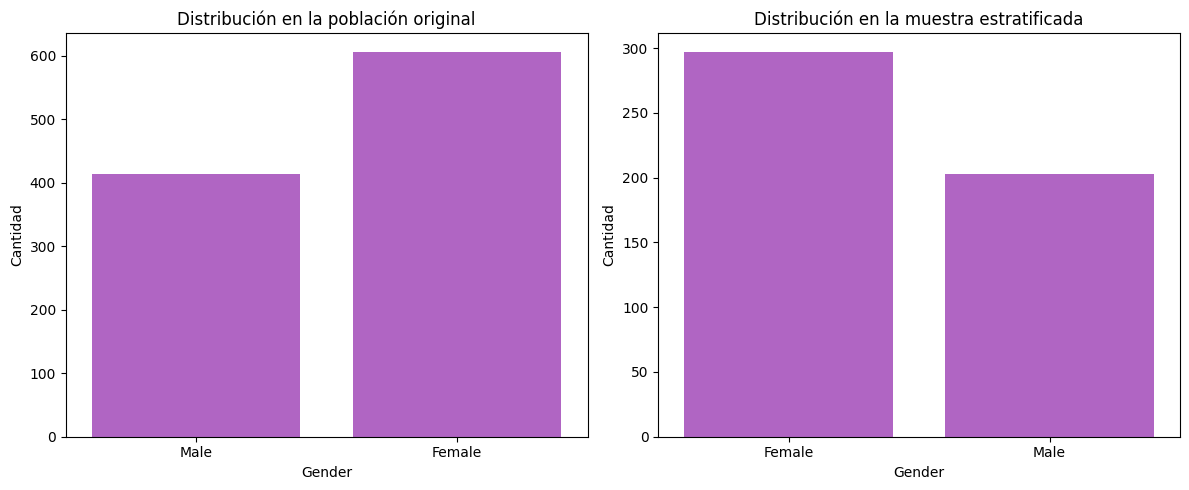

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Población original
sns.countplot(x='Gender', data=df, ax=axes[0], color='mediumorchid')
axes[0].set_title('Distribución en la población original')
axes[0].set_ylabel('Cantidad')

# Muestra estratificada
sns.countplot(x='Gender', data=df_muestra_estr, ax=axes[1], color='mediumorchid')
axes[1].set_title('Distribución en la muestra estratificada')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


### Gráfico de barras: 
Se utilizó este gráfico con el propósito de verificar la efectividad del muestreo estratificado, comparando la distribución de la variable categórica Gender en la población original y en la muestra seleccionada. Aunque la cantidad  de individuos en cada grupo (masculino y femenino) se reduce aproximadamente a la mitad en la muestra estratificada(como es de esperarse al trabajar con una muestra de n=500 frente a la población total) se observa que la proporción relativa entre ambos géneros se mantiene prácticamente constante. Esto confirma que el procedimiento de estratificación preservó adecuadamente la estructura poblacional original, asegurando una muestra representativa en términos de género.

In [ ]:
# Código para encontrar estadísticas métricas de la muestra estratificada
df_metricas_muestra_estr = {
    "T_CRmax": df_muestra_estr['T_CRmax'].tolist(),
    "T_CLmax": df_muestra_estr['T_CLmax'].tolist(),
    "T_CRR_prom": df_muestra_estr['T̅_CRR'].tolist(),
    "T_CRL_prom": df_muestra_estr['T̅_CRL'].tolist(),
    "T_CEmax": df_muestra_estr['T_CEmax'].tolist(),
    "T_FEmax": df_muestra_estr['T_FEmax'].tolist(),
    "T_FCmax": df_muestra_estr['T_FCmax'].tolist(),
    "T_Tmax": df_muestra_estr['T_max'].tolist(),
    "T_Mmax": df_muestra_estr['T_Mmax'].tolist(),
    "T_FC": df_muestra_estr['T_FC'].tolist(),
    "T_FR": df_muestra_estr['T_FR'].tolist(),
    "T_FL": df_muestra_estr['T_FL'].tolist(),
    "T_FB": df_muestra_estr['T_FB'].tolist(),
    "T_FT": df_muestra_estr['T_FT'].tolist(),
    'Gender':df_muestra_estr['Gender'].tolist()
}

# Calcular estadísticas para cada variable de la muestra estratificada
estadisticas_estratificada = {
    nombre: valores_estadisticos(lista) for nombre, lista in df_metricas_muestra_estr.items()
}

# Crear DataFrame con los resultados
df_estadisticas_estratificada = pd.DataFrame(
    estadisticas_estratificada,
    index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"]
)

# Imprimir resultados
print("Estadísticas descriptivas de la muestra estratificada con n=500:\n")
print(tabulate(df_estadisticas_estratificada, headers='keys', tablefmt='github', showindex=True))



Estadísticas descriptivas de la muestra estratificada con n=500:

|          |    T_CRmax |    T_CLmax |   T_CRR_prom |   T_CRL_prom |    T_CEmax |    T_FEmax |    T_FCmax |      T_Tmax |     T_Mmax |       T_FC |       T_FR |       T_FL |       T_FB |       T_FT | Gender   |
|----------|------------|------------|--------------|--------------|------------|------------|------------|-------------|------------|------------|------------|------------|------------|------------|----------|
| Media    | 35.574     | 35.5921    |   34.8761    |   34.9931    | 35.7695    | 35.411     | 35.0892    | 36.0696     | 35.8174    | 34.5654    | 34.5498    | 34.5616    | 34.4785    | 34.5681    | nan      |
| Mediana  | 35.5375    | 35.5588    |   34.9062    |   34.995     | 35.7125    | 35.3675    | 35.1125    | 36.0288     | 35.8287    | 34.5913    | 34.5925    | 34.6112    | 34.5138    | 34.595     | nan      |
| Moda     | 35.6775    | 35.8425    |   35.19      |   34.8025    | 35.545     | 35.64   

**Análisis:**
Al comparar las métricas descriptivas de la población total con las de la muestra estratificada (n=500), se observa una alta similitud en los datos de las metricas estadisticas, lo que indica que el muestreo estratificado logró conservar las características esenciales de la población original. Las diferencias entre ambas son mínimas, lo cual respalda la representatividad de la muestra. Además, en el caso de la variable categórica Gender, la moda se mantiene como "Female" en ambos conjuntos, indicando que la proporción de género fue correctamente representada. En conjunto, estos resultados confirman la efectividad del proceso de estratificación utilizado, permitiendo trabajar con una muestra más reducida sin alterar la poblacion completa.